In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [17]:
data.Purchased.unique()

array([0, 1], dtype=int64)

In [9]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
data['Gender'] = le.fit_transform( data['Gender'] )

In [23]:
data['Gender'].unique()

array([1, 0], dtype=int64)

In [24]:
x = data.iloc[ :, 1:4 ]
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [25]:
y = data.iloc[ : , 4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [26]:
data.shape

(400, 5)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2 )

In [29]:
print( len( x_train.index ) )
x_train.head()

320


,Gender,Age,EstimatedSalary
180,1,26,16000
223,1,60,102000
222,1,37,144000
143,1,30,89000
72,0,20,23000


In [30]:
print( len( x_test.index ) )
x_test.head()

80


,Gender,Age,EstimatedSalary
354,1,36,99000
66,1,24,19000
152,1,31,76000
83,1,35,88000
312,0,38,50000


In [31]:
print( len( y_train.index ) )
y_train.head()

320


180    0
223    1
222    1
143    0
72     0
Name: Purchased, dtype: int64

In [32]:
print( len( y_test.index ) )
y_test.head()

80


354    1
66     0
152    0
83     0
312    0
Name: Purchased, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ssc = StandardScaler()

In [35]:
x_test = ssc.fit_transform( x_test )
x_train = ssc.fit_transform( x_train )

In [36]:
print("Following is x_test\n")
print( x_test )
print()
print( f"len( x_test ) = { len( x_test ) }" )
print('\n\n')
print("Following is x_train\n")
print( x_train )
print()
print( f"len( x_train ) = { len( x_train ) }" )

Following is x_test

[[ 1.16316    -0.20723913  0.91458061]
 [ 1.16316    -1.42778862 -1.46675214]
 [ 1.16316    -0.71580142  0.22994744]
 [ 1.16316    -0.30895159  0.58714736]
 [-0.85972695 -0.00381422 -0.5439857 ]
 [-0.85972695  0.70817299 -0.692819  ]
 [-0.85972695  2.03043493 -0.63328568]
 [-0.85972695  0.40303561  0.64668067]
 [-0.85972695  0.70817299 -1.37745216]
 [ 1.16316     0.80988544 -1.3476855 ]
 [ 1.16316     0.40303561  2.40291358]
 [ 1.16316     2.13214739  1.83734705]
 [ 1.16316    -0.20723913 -0.48445238]
 [-0.85972695 -1.02093879 -0.3951524 ]
 [-0.85972695  1.6235851  -1.25838552]
 [ 1.16316     1.11502282  0.61691401]
 [ 1.16316     0.70817299 -1.07978557]
 [-0.85972695  1.01331036 -1.16908555]
 [-0.85972695  0.1996107   2.19454696]
 [-0.85972695 -1.12265125  0.46808072]
 [ 1.16316     0.1996107  -0.33561908]
 [ 1.16316     0.09789824  1.12294722]
 [-0.85972695  0.1996107   0.11088081]
 [-0.85972695  1.31844773  1.95641369]
 [ 1.16316     0.09789824 -0.78211897]
 [ 1

In [37]:
#Now to use SVM Feature, We must import SVM First.

In [38]:
from sklearn.svm import SVC

In [39]:
svcob = SVC(kernel="rbf" )

In [40]:
svcob.fit( x_train, y_train )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
#Predicting the test set results
y_pred = svcob.predict( x_test )
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [42]:
y_test.values

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [43]:
svcob.score( x_test ,y_test)    #This is Accuracy of our predicted Value 

0.9125

In [44]:
#Now we are checking the accuracy by comparing the actual Data and predicted Data using Confusion Matrix .

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix( y_test, y_pred )
#Do -> ?confusion_matrix

In [47]:
print( cm )

#total Incorrect prediction is fp+fn = 6+2 = 8
#total Correct prediction is tn+tp = 46+26 = 72

#Total no. of index in y_pred or y_test,
print( f"\nlen( y_pred ) = { len( y_pred ) }" )
print( f"len( y_test ) = { len( y_test ) }" )

[[47  5]
 [ 2 26]]

len( y_pred ) = 80
len( y_test ) = 80


In [48]:
accuracy = (47+26)/80
error = ( 2+5 )/ 80

print( f"Accuracy = { accuracy }" )
print( f"Error = { error }" )

Accuracy = 0.9125
Error = 0.0875


In [49]:
import matplotlib.pyplot as plt

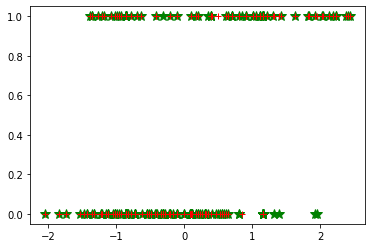

In [50]:
plt.plot( x_test, y_test, color = 'green', marker = '*', markersize = 10, linestyle = '' )
plt.plot( x_test, y_pred, color = 'red', marker = '+', linestyle = '' )

plt.show()

In [51]:
import numpy as np

np.array( y_test )

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [52]:
#?confusion_matrix
#[ T0/ TN ] -> 50  [ F1/ F1 ] ->  10
#[ F0/ FN ] -> 5   [ T1/ TP ] -> 100

#tn = 46
#fp = 6
#fn = 2
#tp = 26

In [53]:
tn, fp, fn, tp = confusion_matrix( [0, 1, 0, 1], [1, 1, 1, 0]).ravel()
tn, fp, fn, tp

(0, 2, 1, 1)